## Modeling
### Experiments with Tree-based Scikit-learn models

**Objective**: The primary objective of this notebook is to perform experimentation with the tree-based models for multi-step ahead forecasting.



In [1]:
import sys
import os

# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))  # Use __file__ for portability

# Move up one level to the project root
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Change working directory
os.chdir(project_root)

# Verify the change
print(os.getcwd()) 

/home/michel/projects/tree-based-forecasting-boilerplate


In [2]:
%load_ext autoreload
%autoreload 2

from scripts.run_wfv import *
from src.models.train_model import *
from src.models.evaluate_model import *
from src.models.predict_model import *
from src.visualization.data_viz import *

In [4]:
feature_df = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, PROCESSED_DATA_NAME), parse_dates=["DATE"])
cv_results_default = pd.read_csv(os.path.join(OUTPUT_DATA_PATH, 'default_validation_results.csv'), parse_dates=["DATE"])
cv_results_tuned = pd.read_csv(os.path.join(OUTPUT_DATA_PATH, 'validation_results.csv'), parse_dates=["DATE"])
# feature_df = feature_df[feature_df[CATEGORY_COL].isin(ticker_list)]

In [5]:
default_metrics = cv_results_default.groupby("TICKER").agg({"RMSE": "mean", "MAPE": "mean", "TRAINING_MAPE": "mean", "TRAINING_RMSE": "mean"})
default_metrics.sort_values("RMSE")

,RMSE,MAPE,TRAINING_MAPE,TRAINING_RMSE
TICKER,,,,
TAEE4.SA,0.166061,0.013355,0.004852,0.054242
BCFF11.SA,0.170606,0.019024,0.023655,0.046364
BRSR6.SA,0.333636,0.026615,0.007418,0.101818
BBSE3.SA,0.527879,0.014076,0.005930,0.171212
CSMG3.SA,0.560909,0.024494,0.008945,0.133030
EGIE3.SA,0.888485,0.018739,0.004482,0.204848
PETR4.SA,1.458182,0.035100,0.014000,0.225455
BOVA11.SA,1.727879,0.012976,0.004742,0.634545


In [6]:
tuned_metrics = cv_results_tuned.groupby("TICKER").agg({"RMSE": "mean", "MAPE": "mean", "TRAINING_MAPE": "mean", "TRAINING_RMSE": "mean"})
tuned_metrics.sort_values("RMSE")

,RMSE,MAPE,TRAINING_MAPE,TRAINING_RMSE
TICKER,,,,
BCFF11.SA,0.145152,0.015812,0.020267,0.053333
TAEE4.SA,0.168182,0.013479,0.008112,0.097273
BRSR6.SA,0.330000,0.026106,0.016352,0.225152
BBSE3.SA,0.474545,0.012470,0.011058,0.323030
CSMG3.SA,0.543333,0.023645,0.011727,0.181212
EGIE3.SA,0.748485,0.015600,0.007167,0.330909
PETR4.SA,1.202424,0.029167,0.012736,0.230000
BOVA11.SA,1.607576,0.012021,0.008027,1.060606


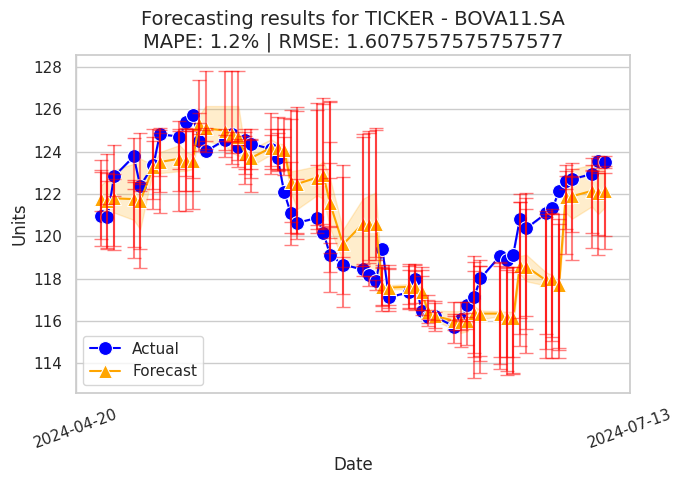

In [7]:
visualize_validation_results(cv_results_tuned[cv_results_tuned['TICKER'] ==data_config["ticker_list"][0] ], data_config["ticker_list"][0])

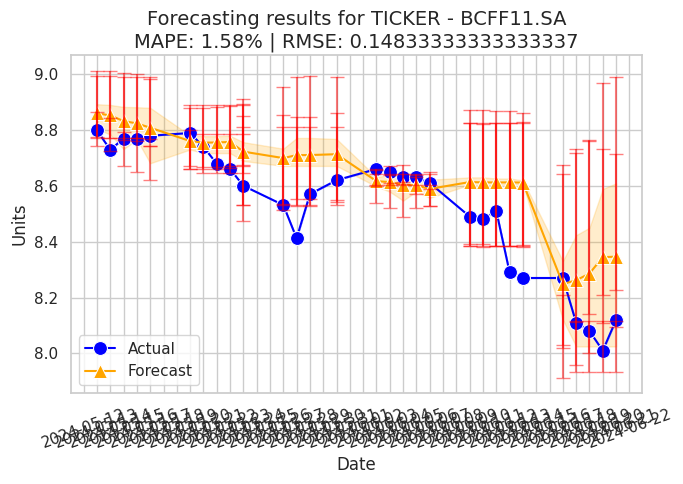

In [18]:
visualize_validation_results(cv_results_tuned[cv_results_tuned['TICKER'] ==data_config["ticker_list"][1] ], data_config["ticker_list"][1])

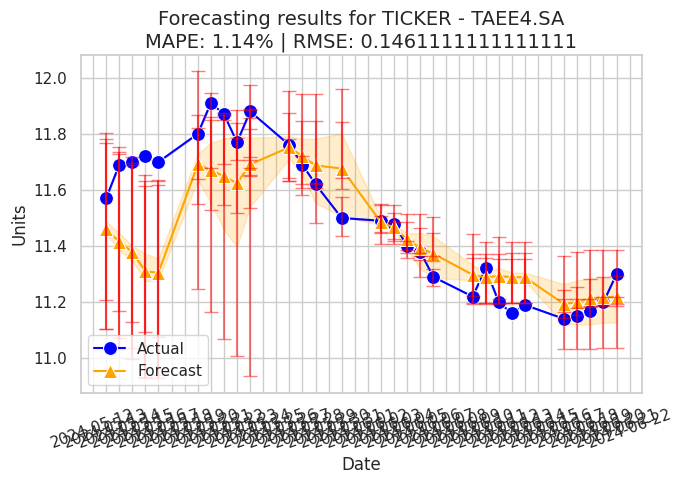

In [23]:
visualize_validation_results(cv_results_tuned[cv_results_tuned['TICKER'] == data_config["ticker_list"][2]], data_config["ticker_list"][2])

In [44]:
90 // 5

18

In [47]:
cv_results_default[cv_results_default['TICKER'] == data_config["ticker_list"][2]]

,DATE,ACTUAL,FORECAST,MAPE,MAE,WAPE,RMSE,MODEL_TYPE,CLASS,TRAINING_MAPE,TRAINING_RMSE,TICKER,TRAINING_DATE
180,2024-05-13,11.57,11.507608,0.0120,0.14,0.01,0.15,XGBRegressor,Testing,0.0017,0.02,TAEE4.SA,2024-06-23
181,2024-05-14,11.69,11.552718,0.0120,0.14,0.01,0.15,XGBRegressor,Testing,0.0017,0.02,TAEE4.SA,2024-06-23
182,2024-05-15,11.70,11.575998,0.0120,0.14,0.01,0.15,XGBRegressor,Testing,0.0017,0.02,TAEE4.SA,2024-06-23
183,2024-05-16,11.72,11.564269,0.0120,0.14,0.01,0.15,XGBRegressor,Testing,0.0017,0.02,TAEE4.SA,2024-06-23
184,2024-05-17,11.70,11.477134,0.0120,0.14,0.01,0.15,XGBRegressor,Testing,0.0017,0.02,TAEE4.SA,2024-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2024-06-17,11.14,11.242032,0.0071,0.08,0.01,0.08,AdaBoostRegressor,Testing,0.0128,0.14,TAEE4.SA,2024-06-23
266,2024-06-18,11.15,11.248938,0.0071,0.08,0.01,0.08,AdaBoostRegressor,Testing,0.0128,0.14,TAEE4.SA,2024-06-23
267,2024-06-19,11.17,11.263031,0.0071,0.08,0.01,0.08,AdaBoostRegressor,Testing,0.0128,0.14,TAEE4.SA,2024-06-23
268,2024-06-20,11.20,11.263031,0.0071,0.08,0.01,0.08,AdaBoostRegressor,Testing,0.0128,0.14,TAEE4.SA,2024-06-23


In [52]:
pred_df = cv_results_default[(cv_results_default['TICKER'] == data_config["ticker_list"][2])
                            & (cv_results_default["MODEL_TYPE"] == 'AdaBoostRegressor')]

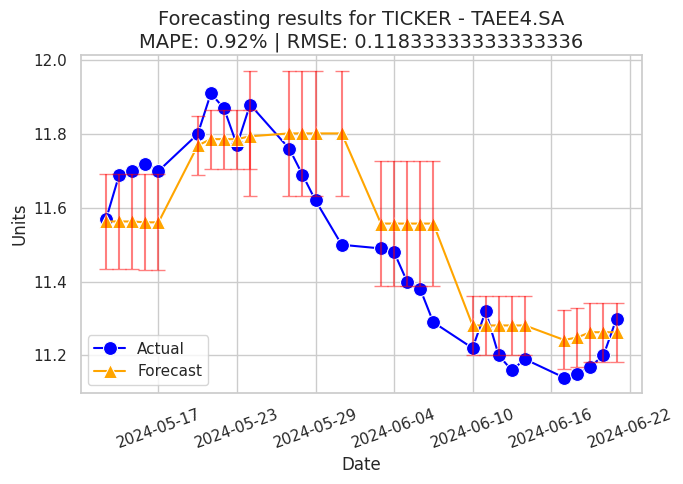

In [59]:
visualize_validation_results(pred_df, data_config["ticker_list"][2])